In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow_datasets as tfds

In [3]:
tfds.disable_progress_bar()

In [4]:
(train_data, test_data), info = tfds.load(
    'horses_or_humans',
    split=(tfds.Split.TRAIN, tfds.Split.TEST),
    batch_size=-1, with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteCCDIIT/horses_or_humans-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteCCDIIT/horses_or_humans-test.tfrecord
Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


In [5]:
train_dict = tfds.as_numpy(train_data)
test_dict = tfds.as_numpy(test_data)

In [6]:
train_images, train_labels = train_dict['image'], train_dict['label']
test_images, test_labels = test_dict['image'], test_dict['label']

In [7]:
print(info)

tfds.core.DatasetInfo(
    name='horses_or_humans',
    version=3.0.0,
    description='A large set of images of horses and humans.',
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=1283,
    splits={
        'test': 256,
        'train': 1027,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
    redistribution_info=,
)



In [8]:
import matplotlib.pyplot as plt

In [9]:
horse_or_human = ['horse', 'human']

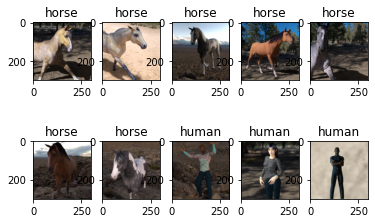

In [10]:
for i, (image, label) in enumerate(zip(train_images[:10], train_labels[:10])):
  plt.subplot(2, 5, i+1)
  plt.imshow(image)
  plt.title('{}'.format(horse_or_human[label]))

In [13]:
from tensorflow import keras

l = keras.layers
model = keras.Sequential([
    l.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    l.MaxPooling2D(2, 2),
    l.Conv2D(32, (3, 3), activation='relu'),
    l.MaxPooling2D(2, 2),
    l.Conv2D(64, (3, 3), activation='relu'),
    l.MaxPooling2D(2, 2),
    l.Conv2D(64, (3, 3), activation='relu'),
    l.MaxPooling2D(2, 2),
    l.Conv2D(64, (3, 3), activation='relu'),
    l.MaxPooling2D(2, 2),
    l.Flatten(),
    l.Dense(512, activation='relu'),
    l.Dense(1, activation='sigmoid')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)        3

In [15]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(lr=0.0001), metrics = ['accuracy'])
model.fit(train_images/255., train_labels, batch_size=32, epochs=5, verbose=1, validation_data=(test_images/255., test_labels))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
33/33 [==============================] - 92s 3s/step - loss: 0.6101 - accuracy: 0.6981 - val_loss: 0.4764 - val_accuracy: 0.8398
Epoch 2/5
33/33 [==============================] - 90s 3s/step - loss: 0.3241 - accuracy: 0.8880 - val_loss: 0.9238 - val_accuracy: 0.7344
Epoch 3/5
33/33 [==============================] - 90s 3s/step - loss: 0.1435 - accuracy: 0.9562 - val_loss: 1.4179 - val_accuracy: 0.7656
Epoch 4/5
33/33 [==============================] - 90s 3s/step - loss: 0.0947 - accuracy: 0.9679 - val_loss: 1.3107 - val_accuracy: 0.8086
Epoch 5/5
33/33 [==============================] - 91s 3s/step - loss: 0.0618 - accuracy: 0.9796 - val_loss: 1.4080 - val_accuracy: 0.8125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


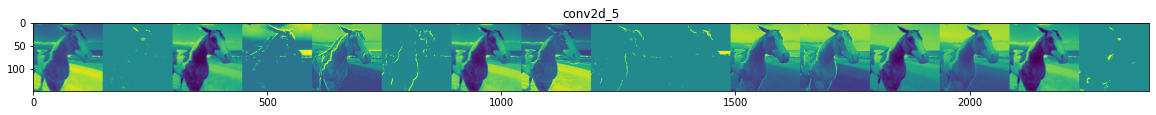

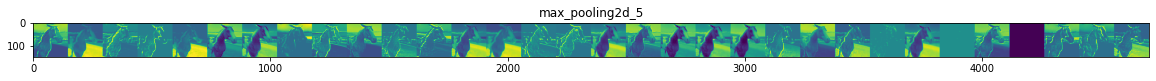

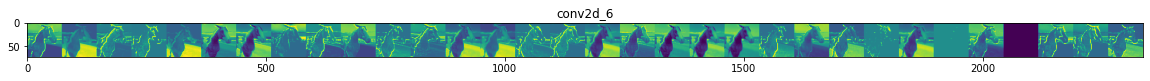

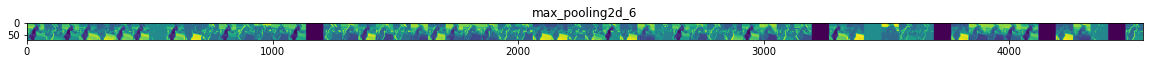

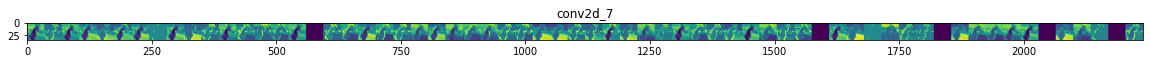

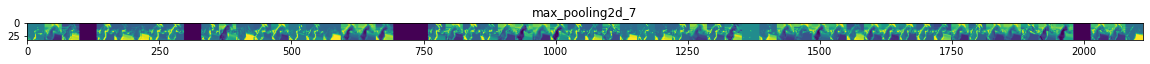

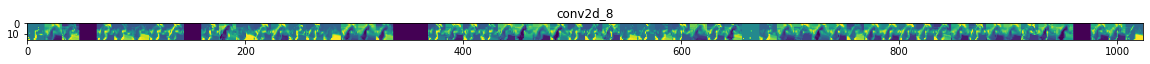

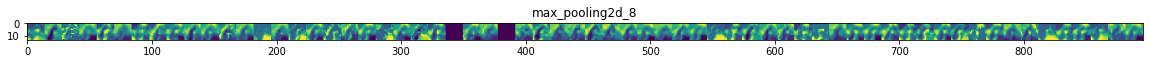

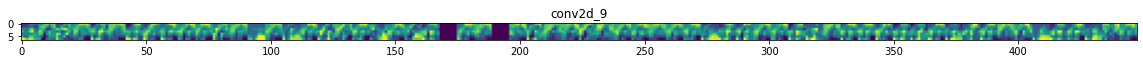

In [17]:
import  numpy as np
import random
from tensorflow import keras
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# モデルの各レイヤーの出力（中間表現）をリストとして取得
successive_outputs = [layer.output for layer in model.layers[1:]]
# 中間表現を出力とするモデルを構築
visualization_model = keras.models.Model(inputs=model.input, outputs=successive_outputs)

# 訓練データセットからランダムに一枚取得
index = random.randint(0, len(train_images))
x = train_images[index]
x = np.expand_dims(x, axis=0)

# 正規化
x = x / 255.

# ランダムに取得した画像に対する中間表現を得る
successive_feature_maps = visualization_model.predict(x)

# プロットのために各レイヤーの名前をリストに格納
layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  # 畳み込みとプーリングの出力のみ描画
  if len(feature_map.shape) == 4:
    # feature_map.shape: (1, size, size, n_features)
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    # プロットのグリッドを準備
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # [0, 255] の範囲できれいに描画できるように調整
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x
    # 各グリッドに対して特徴量マップの描画
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')